# **Section 3 (Preprocessing)**
### Part 1 (Persian Data)

**Steps:**
1.   Mount Google Drive to load data from my drive
2.   Install necessary packages for preprocessing
      * **[Hazm package (Persian NLP Toolkit)](https://github.com/roshan-research/hazm)**: Hazm is a python library to perform natural language processing tasks on Persian text. It offers various features for analyzing, processing, and understanding Persian text. You can use Hazm to normalize text, tokenize sentences and words, lemmatize words, assign part-of-speech tags, identify dependency relations, create word and sentence embeddings, or read popular Persian corpora.
      *   **[re pacakge (Regular expression operations):](https://docs.python.org/3/library/re.html)** The re module provides a set of powerful regular expression facilities, which allows you to quickly check whether a given string matches a given pattern (using the match function), or contains such a pattern (using the search function)
3.    Read persian data from google drive
4.    Preprocessing section:
      * **[Sentence Tokenizer](https://www.roshan-ai.ir/hazm/docs/content/hazm/sentence_tokenizer.html)**: Splits text into sentences(tokens).
      *  **[Normalizer(correct_spacing):](https://www.roshan-ai.ir/hazm/docs/content/hazm/normalizer.html#hazm.normalizer.Normalizer.correct_spacing)** If True, corrects spacing in text, punctuation, and prefixes and suffixes.
      *  **[Normalizer(normalize):](https://www.roshan-ai.ir/hazm/docs/content/hazm/normalizer.html#hazm.normalizer.Normalizer)** Converts text to a standard form, such as removing diacritics, correcting spacing, etc.
      *  **[re.sub(r'[^\w\s]', '', sentence):](https://docs.python.org/3/library/re.html#re.sub)** Remove punctuations from the text.
      *  **[re.compile.sub:](https://docs.python.org/3/library/re.html#re.compile)** Remove all types of emojis based on the unicode characters that I defined in the compile function (We use u'' literal to create a Unicode string.)
      * **[WordTokenizer:](https://www.roshan-ai.ir/hazm/docs/content/hazm/word_tokenizer.html)** Splits sentences into words(tokenx).
      * **[stopwords_list:](https://www.roshan-ai.ir/hazm/docs/content/utils.html#hazm.utils.stopwords_list)** It has list of stopwords in persian language. We can use to remove all stopwords from the text.
      * **[Lemmatizer:](https://www.roshan-ai.ir/hazm/docs/content/hazm/lemmatizer.html)** Reduces words to their base forms.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 26.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 22.9 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9296 sha256=248338f6465d005353d626a93761b1c3f9139191b205136ceb9428fee484790c
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This

In [2]:
import re
from hazm import stopwords_list
from hazm import *

In [3]:
with open("/content/drive/MyDrive/NLP/HW1/hp_fa.txt") as f:
  content = f.read()

In [4]:
# ==================== Sentence Tokenizer ====================
tokenizer = SentenceTokenizer()
seperated_sentences = tokenizer.tokenize(content)
# ==================== Preprocessing 1 (Remove Spaces) ====================
normalizer = Normalizer()
removed_spaces=[]
for sentence in seperated_sentences:
  removed_spaces.append(normalizer.correct_spacing(sentence))
del seperated_sentences
# ==================== Preprocessing 2 (Normalization) ====================
normalizer = Normalizer()
normalized_sentences=[]
for sentence in removed_spaces:
  normalized_sentences.append(normalizer.normalize(sentence))
del removed_spaces
# ==================== Preprocessing 3 (Remove Punctuations) ====================
removed_punctuations=[]
for sentence in normalized_sentences:
  removed_punctuations.append(re.sub(r'[^\w\s]', '', sentence))
del normalized_sentences
# ==================== Preprocessing 4 (Remove Emojis) ====================
removed_emojis=[]
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            "]+", flags=re.UNICODE)
for sentence in removed_punctuations:
  removed_emojis.append(emoji_pattern.sub(r'', sentence))
del removed_punctuations
# ==================== Word Tokenizer ====================
tokenizer = WordTokenizer()
tokenized_sentences=[]
for sentence in removed_emojis:
  tokenized_sentence = tokenizer.tokenize(sentence)
  tokenized_sentences.append(tokenized_sentence)
del removed_emojis
# ==================== Preprocessing 5 (Remove Stopwords) ====================
removed_stopwords=[]
for tokenized_sentence in tokenized_sentences:
  removed_stopwords.append([word for word in tokenized_sentence if word not in stopwords_list()])
del tokenized_sentences
# ==================== Preprocessing 6 (Lemmatization) ====================
lemmatizer = Lemmatizer()
lemmatized_text=[]
for tokenized_sentence in removed_stopwords:
  lemmatized_text.append([lemmatizer.lemmatize(word) for word in tokenized_sentence])
del removed_stopwords
final_text = lemmatized_text.copy()
del lemmatized_text
final_text

[['آقا',
  'خانم',
  'دورسلی',
  'ساکن',
  'خانه',
  'شماره',
  'خیابان',
  'پریوت',
  'درایو'],
 ['خانواده',
  'معمولی',
  'عادی',
  'بابت',
  'راضی',
  'خوشنود',
  'خانواده',
  'وجه',
  'امور',
  'مرموز',
  'اسرار',
  'آمیز',
  'سروکار',
  'داشت#دار',
  'سحر',
  'جادو',
  'مهمل',
  'بیهود',
  'میپنداشتند',
  'علاق',
  'اینگونه',
  'مسائل',
  'داشت#دار',
  '#هست',
  'دورسلی',
  'مدیر',
  'شرکت',
  'دریل',
  'گرونینگز',
  'مردی',
  'درشتاندام',
  'قوی',
  'هیکل',
  'گردنی',
  'کوتاه',
  'سبیل',
  'لندید#لند',
  'همسر',
  'خانم',
  'دورسلی',
  'زنی',
  'لاغر',
  'اندام',
  'موهای',
  'بور',
  'گردنی',
  'کشیده',
  'بلند',
  'لندید#لند',
  'گردنش',
  'برایش',
  'مفید',
  'وقتش',
  'سرک',
  'کشیدن',
  'خانهی',
  'همسایه',
  'میکرد',
  'پسری',
  'نام',
  'دادلی',
  'عقیده',
  'خودشان',
  'لنگه',
  'داشت#دار',
  'خانواده',
  'مرفه',
  'کسری',
  'داشت#دار',
  'خانواده',
  'رازی',
  'برملا',
  'میشد'],
 ['هول', 'هراس', 'مبادا', 'روزید#روز', 'راز', 'برد#بر'],
 ['تصور', 'خانواده', 'پاتر', 'دانس

# **Section 3 (Preprocessing)**
### Part 2 (English Data)

**Steps:**
1.   Mount Google Drive to load data from my drive
2.   Install necessary packages for preprocessing
      * **[NLTK(Natural Language Toolkit):](https://www.nltk.org/)** NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.
      * **[re pacakge (Regular expression operations):](https://docs.python.org/3/library/re.html)** The re module provides a set of powerful regular expression facilities, which allows you to quickly check whether a given string matches a given pattern (using the match function), or contains such a pattern (using the search function)
      * **[NumPy:](https://numpy.org/)** The fundamental package for scientific computing with Python
      * **[Matplotlib (Visualization with Python):](https://matplotlib.org/)** Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
      * **[WordCloud:](https://amueller.github.io/word_cloud/)** A little word cloud generator in Python.
3.    Read english data from google drive
4.    Preprocessing section:
      * **[sent_tokenize:](https://www.nltk.org/api/nltk.tokenize.sent_tokenize.html)** Return a sentence-tokenized copy of text, using NLTK’s recommended sentence tokenizer
      * **[re.sub(r'\s+',' ',sentence):](https://docs.python.org/3/library/re.html#re.sub)** Remove spaces from the text.
      * **[lower:](https://www.w3schools.com/python/ref_string_lower.asp)** The lower() method returns a string where all characters are lower case.
      * **[re.sub(r'\d+', '', sentence):](https://docs.python.org/3/library/re.html#re.sub)** Remove all digits and numbers from the text.
      * **[re.sub(r'http\S+|www\S+|https\S+', '',sentence):](https://www.w3schools.com/python/ref_string_lower.asp)** Remove all types of URLs such as "www", "http", and "https" from the text.
      * **[string.punctuation:](https://docs.python.org/3/library/string.html#string.punctuation)** String of ASCII characters which are considered punctuation characters in the C locale: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~. (Remove punctuations from the text.)
      * **[word_tokenize:](https://www.nltk.org/api/nltk.tokenize.word_tokenize.html)** Return a tokenized copy of text, using NLTK’s recommended word tokenizer
      * **[nltk.corpus.stopwords.words('english'):](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/)** Remove stopwords from the text.(A stop word is a commonly used word (such as “the”, “a”, “an”, or “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.)
      * **[extend:](https://docs.python.org/3/tutorial/datastructures.html)** Join words to have one complete text in order to make a wordcloud. (Extend the list by appending all the items from the iterable. Equivalent to a[len(a):] = iterable.)
      * **[WordCloud:](https://amueller.github.io/word_cloud/references.html)** Generate word cloud from the text.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
with open("/content/drive/MyDrive/NLP/HW1/hp_en.txt") as f:
  content = f.read()

In [6]:
import nltk
nltk.download()
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize
import re
import nltk
from nltk import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


﻿ chapter one boy lived mr mrs dursley number four privet drive proud say perfectly normal thank much last people youd expect involved anything strange mysterious didnt hold nonsense mr dursley director firm called grunnings made drills big beefy man hardly neck although large mustache mrs dursley thin blonde nearly twice usual amount neck came useful spent much time craning garden fences spying neighbors dursleys small son called dudley opinion finer boy anywhere dursleys everything wanted also secret greatest fear somebody would discover didnt think could bear anyone found potters mrs potter mrs dursleys sister hadnt met several years fact mrs dursley pretended didnt sister sister goodfornothing husband undursleyish possible dursleys shuddered think neighbors would say potters arrived street dursleys knew potters small son never even seen boy another good reason keeping potters away didnt want dudley mixing child like mr mrs dursley woke dull gray tuesday story starts nothing cloudy 

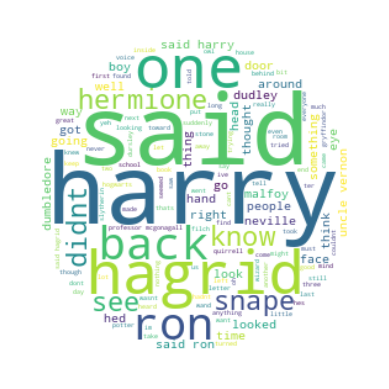

In [8]:
from nltk.tokenize import sent_tokenize
import re
import nltk
from nltk import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string

# ==================== Sentence Tokenizer ====================
tokenized_sentences = sent_tokenize(content)
# ==================== Preprocessing 1 (Remove Spaces) ====================
removed_spaces = []
for sentence in tokenized_sentences:
  removed_spaces.append(re.sub(r'\s+',' ',sentence))
del tokenized_sentences
# ==================== Preprocessing 2 (Lowercase) ====================
lowercased_sentences = []
for sentence in removed_spaces:
  lowercased_sentences.append(sentence.lower())
del removed_spaces
# ==================== Preprocessing 3 (Remove Numbers) ====================
removed_numbers=[]
for sentence in lowercased_sentences:
  removed_numbers.append(re.sub(r'\d+', '', sentence))
del lowercased_sentences
# ==================== Preprocessing 4 (Remove URLs) ====================
removed_URLs = []
for sentence in removed_numbers:
  removed_URLs.append(re.sub(r'http\S+|www\S+|https\S+', '',sentence))
del removed_numbers
# ==================== Preprocessing 5 (Remove Punctuations) ====================
removed_punctuations = []
for sentence in removed_URLs:
  removed_punctuations.append("".join([i for i in sentence if i not in string.punctuation]))
del removed_URLs
# ==================== Word Tokenizer ====================
tokenized_words=[]
for sentence in removed_punctuations:
  tokenized_words.append(word_tokenize(sentence))
del removed_punctuations
# ==================== Preprocessing 3 (Remove Stopwords) ====================
stopwords = nltk.corpus.stopwords.words('english')
removed_stopwords=[]
for sentence in tokenized_words:
  removed_stopwords.append([word for word in sentence if word not in stopwords])
del tokenized_words
# ==================== Preprocessing 3 (Join Words List) ====================
words_list = []
for sentence in removed_stopwords:
  words_list.extend(sentence)

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(' '.join(words_list))
print(' '.join(words_list))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

# **Section 4 (Spell Checker)**

**Steps:**
1.   Mount Google Drive to load data from my drive
2.   Install necessary packages for preprocessing
      * **[NLTK(Natural Language Toolkit):](https://www.nltk.org/)** NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.
      * **[NumPy:](https://numpy.org/)** The fundamental package for scientific computing with Python
3.   **levenshtein_distance function:** Levenshtein distance is a measure of the similarity between two strings, which takes into account the number of insertion, deletion and substitution operations needed to transform one string into the other.
      * **Insertion:** Adding a character to string A.
      * **Deletion:** Removing a character from string A.
      * **Replacement:** Replacing a character in string A with another character.
* Example:

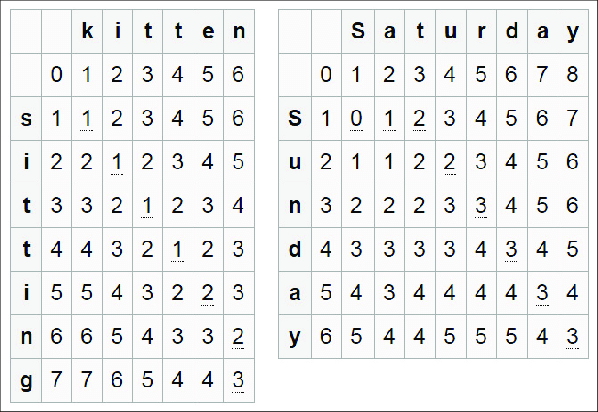

4.  Read dictionary from google drive
5.  Store original and incorrect text using [this website](http://www.hakank.org/reading_scrambled_words/g_spell.cgi) in variables to test our algorithm.
6.  Test our algorithm with the incorrect textand print each word like this : "{Incorrect word} => {Correct Word}"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
import nltk
nltk.download()
nltk.download('punkt')
import numpy as np
from nltk import word_tokenize

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
def levenshtein_distance(w1, w2):
    if len(w1) < len(w2):
        return levenshtein_distance(w2, w1)
    if len(w2) == 0:
        return len(w1)
    previous_row = range(len(w2) + 1)
    for i, l1 in enumerate(w1):
        current_row = [i + 1]
        for j, l2 in enumerate(w2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (l1 != l2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    return previous_row[-1]

def spell_checker(word, dictionary):
    min_distance = float('inf')
    closest_word = None
    for dictionary_word in dictionary:
        distance = levenshtein_distance(word, dictionary_word)
        if distance < min_distance:
            min_distance = distance
            closest_word = dictionary_word
    return closest_word

In [11]:
with open('/content/drive/MyDrive/NLP/HW1/Vocabulary.txt', 'r') as file:
    dictionary = [line.strip() for line in file]

In [12]:
wrong_text = "ext summariztaion nystems ahve mafde significant progsress pn raecent yearg, buz typicaily genrate summaries ig ne sigle tsep."
original_text = "Text summarization systems have made significant progress in recent years, but typically generate summaries in one single step."

In [13]:
words_list = word_tokenize(wrong_text)
for word in words_list:
  closest_word = spell_checker(word, dictionary)
  print(word, " => ", closest_word)

ext  =>  eat
summariztaion  =>  summarization
nystems  =>  systems
ahve  =>  abe
mafde  =>  made
significant  =>  significant
progsress  =>  progress
pn  =>  an
raecent  =>  recent
yearg  =>  year
,  =>  a
buz  =>  bud
typicaily  =>  typically
genrate  =>  generate
summaries  =>  summaries
ig  =>  big
ne  =>  ne
sigle  =>  sidle
tsep  =>  asp
.  =>  a
